<a href="https://colab.research.google.com/github/hmcoo/Colab/blob/master/Project_3_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
#     input_shape1 = (2, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#     input_shape1 = (img_rows, img_cols, 2)

x_train = x_train.astype('float32')
    
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train0 = keras.utils.to_categorical(y_train, num_classes)
y_test0 = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))


In [0]:
# # convert class vectors to binary class matrices
y_train1 = keras.utils.to_categorical(y_train, num_classes)
y_test1 = keras.utils.to_categorical(y_test, num_classes)

model_kernel = Sequential()
model_kernel.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model_kernel.add(MaxPooling2D(pool_size=(2, 2)))
model_kernel.add(Conv2D(16, (5, 5), activation='relu'))
model_kernel.add(MaxPooling2D(pool_size=(2, 2)))
model_kernel.add(Flatten())
model_kernel.add(Dense(120, activation='relu'))
model_kernel.add(Dense(84, activation='relu'))

model_kernel.add(Dense(num_classes, activation='softmax'))


In [0]:
y_train2 = keras.utils.to_categorical(y_train, num_classes)
y_test2 = keras.utils.to_categorical(y_test, num_classes)

model_fmaps = Sequential()
model_fmaps.add(Conv2D(12, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_fmaps.add(MaxPooling2D(pool_size=(2, 2)))
model_fmaps.add(Conv2D(24, (3, 3), activation='relu'))
model_fmaps.add(MaxPooling2D(pool_size=(2, 2)))
model_fmaps.add(Flatten())
model_fmaps.add(Dense(120, activation='relu'))
model_fmaps.add(Dense(84, activation='relu'))

model_fmaps.add(Dense(num_classes, activation='softmax'))


In [6]:
model.summary()
model_kernel.summary()
model_fmaps.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [7]:
model_fmaps.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

result_fmaps = model_fmaps.fit(x_train, y_train2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test2))
score_fmaps = model_fmaps.evaluate(x_test, y_test2, verbose=0)
print('Test loss:', score_fmaps[0])
print('Test accuracy:', score_fmaps[1])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 24s 406us/step - loss: 0.2985 - acc: 0.9074 - val_loss: 0.0873 - val_acc: 0.9715
Epoch 2/12
60000/60000 [==============================] - 24s 400us/step - loss: 0.0764 - acc: 0.9764 - val_loss: 0.0622 - val_acc: 0.9780
Epoch 3/12
60000/60000 [==============================] - 24s 398us/step - loss: 0.0550 - acc: 0.9829 - val_loss: 0.0375 - val_acc: 0.9873
Epoch 4/12
60000/60000 [==============================] - 24s 399us/step - loss: 0.0422 - acc: 0.9868 - val_loss: 0.0495 - val_acc: 0.9834
Epoch 5/12
60000/60000 [==============================] - 24s 397us/step - loss: 0.0341 - acc: 0.9892 - val_loss: 0.0429 - val_acc: 0.9853
Epoch 6/12
60000/60000 [==============================] - 24s 403us/step - loss: 0.0290 - acc: 0.9906 - val_loss: 0.0314 - val_acc: 0.9903
Epoch 7/12
6

In [8]:
# https://keras.io/optimizers/ 


model_kernel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

result_kernel = model_kernel.fit(x_train, y_train1,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test1))
score_kernel = model_kernel.evaluate(x_test, y_test1, verbose=0)
print('Test loss:', score_kernel[0])
print('Test accuracy:', score_kernel[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 397us/step - loss: 0.3064 - acc: 0.9018 - val_loss: 0.0964 - val_acc: 0.9695
Epoch 2/12
60000/60000 [==============================] - 23s 389us/step - loss: 0.0788 - acc: 0.9754 - val_loss: 0.0646 - val_acc: 0.9792
Epoch 3/12
60000/60000 [==============================] - 23s 388us/step - loss: 0.0565 - acc: 0.9826 - val_loss: 0.0479 - val_acc: 0.9843
Epoch 4/12
60000/60000 [==============================] - 23s 389us/step - loss: 0.0446 - acc: 0.9862 - val_loss: 0.0442 - val_acc: 0.9854
Epoch 5/12
60000/60000 [==============================] - 24s 392us/step - loss: 0.0379 - acc: 0.9885 - val_loss: 0.0395 - val_acc: 0.9876
Epoch 6/12
60000/60000 [==============================] - 24s 392us/step - loss: 0.0309 - acc: 0.9900 - val_loss: 0.0363 - val_acc: 0.9877
Epoch 7/12
60000/60000 [==============================] - 24s 397us/step - loss: 0.0270 - acc: 0.9917 - val_loss: 0.

In [9]:
# https://keras.io/optimizers/ 

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

result = model.fit(x_train, y_train0,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test0))
score = model.evaluate(x_test, y_test0, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 337us/step - loss: 0.3845 - acc: 0.8905 - val_loss: 0.0858 - val_acc: 0.9718
Epoch 2/12
60000/60000 [==============================] - 20s 329us/step - loss: 0.0846 - acc: 0.9739 - val_loss: 0.1007 - val_acc: 0.9659
Epoch 3/12
60000/60000 [==============================] - 20s 328us/step - loss: 0.0610 - acc: 0.9808 - val_loss: 0.0845 - val_acc: 0.9749
Epoch 4/12
60000/60000 [==============================] - 20s 326us/step - loss: 0.0486 - acc: 0.9847 - val_loss: 0.0642 - val_acc: 0.9797
Epoch 5/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.0483 - val_acc: 0.9843
Epoch 6/12
60000/60000 [==============================] - 20s 328us/step - loss: 0.0359 - acc: 0.9883 - val_loss: 0.0424 - val_acc: 0.9881
Epoch 7/12
60000/60000 [==============================] - 20s 329us/step - loss: 0.0301 - acc: 0.9905 - val_loss: 0.

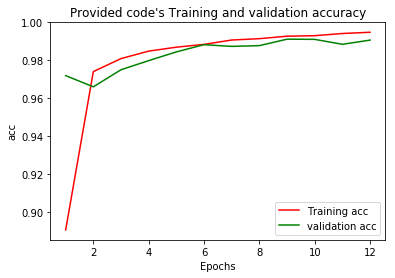

In [10]:
acc = result.history['acc']
val_acc = result.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='validation acc')

plt.title('Provided code\'s Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


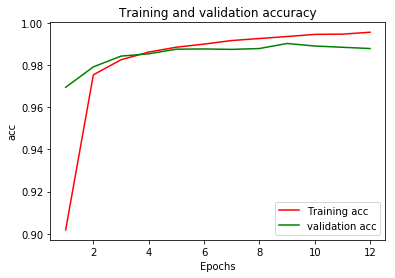

In [11]:
acc_kernel = result_kernel.history['acc']
val_acc_kernel = result_kernel.history['val_acc']

epochs = range(1, len(acc_kernel) + 1)
plt.plot(epochs, acc_kernel, color='red', label='Training acc')
plt.plot(epochs, val_acc_kernel, color='green', label='validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


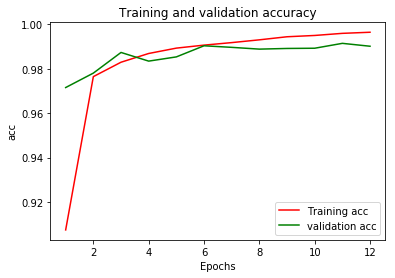

In [12]:
acc_fmaps = result_fmaps.history['acc']
val_acc_fmaps = result_fmaps.history['val_acc']

epochs = range(1, len(acc_fmaps) + 1)
plt.plot(epochs, acc_fmaps, color='red', label='Training acc')
plt.plot(epochs, val_acc_fmaps, color='green', label='validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
